<a href="https://colab.research.google.com/github/leyanetpiedra/PDI/blob/main/P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download the image
!wget -O ACRIMA.jpg https://raw.githubusercontent.com/dilp90/PDI/refs/heads/main/Imagenes/Im004_ACRIMA.jpg
# Use -O to specify the output filename

!wget -O PULMON.jpg https://raw.githubusercontent.com/NelissaTorres/Lab-PDI/refs/heads/main/PULMON.jpg # Changed link to download the image directly

!wget -O CAP.jpg https://raw.githubusercontent.com/NelissaTorres/Lab-PDI/refs/heads/main/CAP.jpg # Changed link to download the image directly

--2025-05-24 22:37:29--  https://raw.githubusercontent.com/dilp90/PDI/refs/heads/main/Imagenes/Im004_ACRIMA.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21593 (21K) [image/jpeg]
Saving to: ‘ACRIMA.jpg’

ACRIMA.jpg          100%[===================>]  21.09K  --.-KB/s    in 0.002s  

2025-05-24 22:37:29 (8.92 MB/s) - ‘ACRIMA.jpg’ saved [21593/21593]

--2025-05-24 22:37:29--  https://raw.githubusercontent.com/NelissaTorres/Lab-PDI/refs/heads/main/PULMON.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81597 (80K) [image/jp

In [3]:
# Cargar imagen oscura
img_bgr1 = cv2.imread("ACRIMA.jpg")
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)

img_bgr2 = cv2.imread("PULMON.jpg")
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)

img_bgr3 = cv2.imread("CAP.jpg")
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)

In [4]:
# Convertir a HSV
img_hsv1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2HSV)
img_hsv2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2HSV)
img_hsv3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2HSV)

# Separar canales H, S y V
h1, s1, v1 = cv2.split(img_hsv1)
h2, s2, v2 = cv2.split(img_hsv2)
h3, s3, v3 = cv2.split(img_hsv3)

# Ecualizar solo el canal de valor (brillo)
v_eq1 = cv2.equalizeHist(v1)
v_eq2 = cv2.equalizeHist(v2)
v_eq3 = cv2.equalizeHist(v3)

# Combinar canales con el V ecualizado
img_hsv1_eq1 = cv2.merge([h1, s1, v_eq1]) # Use corresponding h1, s1
img_hsv2_eq2 = cv2.merge([h2, s2, v_eq2]) # Use corresponding h2, s2
img_hsv3_eq3 = cv2.merge([h3, s3, v_eq3]) # Use corresponding h3, s3

# Convertir de nuevo a BGR y luego a RGB para visualización
img_eq_bgr1 = cv2.cvtColor(img_hsv1_eq1, cv2.COLOR_HSV2BGR)
img_eq_rgb1 = cv2.cvtColor(img_eq_bgr1, cv2.COLOR_BGR2RGB)

img_eq_bgr2 = cv2.cvtColor(img_hsv2_eq2, cv2.COLOR_HSV2BGR)
img_eq_rgb2 = cv2.cvtColor(img_eq_bgr2, cv2.COLOR_BGR2RGB)

img_eq_bgr3 = cv2.cvtColor(img_hsv3_eq3, cv2.COLOR_HSV2BGR)
img_eq_rgb3 = cv2.cvtColor(img_eq_bgr3, cv2.COLOR_BGR2RGB)

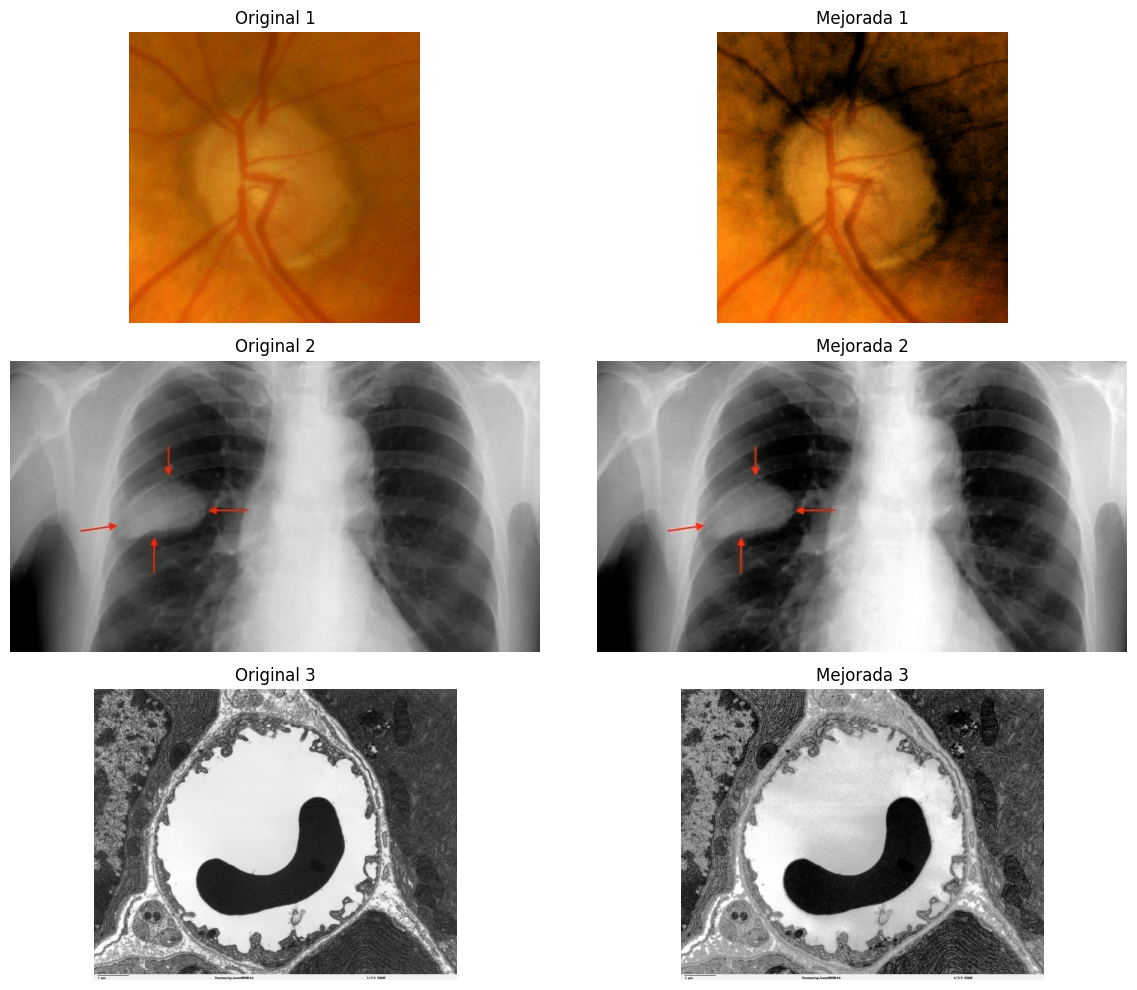

In [5]:
# Mostrar imágenes en 3 filas: original | mejorada
plt.figure(figsize=(12, 10))

# Imagen 1
plt.subplot(3, 2, 1)
plt.imshow(img_rgb1)
plt.title('Original 1')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(img_eq_rgb1)
plt.title('Mejorada 1')
plt.axis('off')

# Imagen 2
plt.subplot(3, 2, 3)
plt.imshow(img_rgb2)
plt.title('Original 2')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(img_eq_rgb2)
plt.title('Mejorada 2')
plt.axis('off')

# Imagen 3
plt.subplot(3, 2, 5)
plt.imshow(img_rgb3)
plt.title('Original 3')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(img_eq_rgb3)
plt.title('Mejorada 3')
plt.axis('off')

plt.tight_layout()
plt.show()